In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<center>
<img src="logo.png" height="900">
</center>


#  DATA

В файле `walmart.csv` нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors # COLOR MAPS: https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataAnalitycs/Statistics/HW4_EDA/walmart.csv")
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [23]:
df.sample(5)

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Hour,Weekday
105204,11,2010-09-03,82,18003.04,False,A,207499,84.94,2.577,NaN,...,NaN,NaN,NaN,214.848169,7.346,2010,9,3,0,4
379392,41,2012-09-21,10,16043.84,False,A,196321,59.81,3.765,11062.12,...,6.00,1125.21,7962.34,198.358523,6.432,2012,9,21,0,4
351032,38,2011-12-16,1,9793.63,False,C,39690,43.29,3.600,152.89,...,NaN,2.28,766.96,129.898065,12.890,2011,12,16,0,4
171121,18,2012-09-14,38,61853.06,False,B,120653,64.45,3.988,10608.96,...,12.41,1458.55,5520.31,138.567300,8.535,2012,9,14,0,4
48196,5,2011-07-08,96,7924.68,False,B,34875,86.64,3.480,NaN,...,NaN,NaN,NaN,215.840949,6.529,2011,7,8,0,4


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
# split datetime into particular time points
df['Year'] = df.Date.apply(lambda x: x.year)
df['Month'] = df.Date.apply(lambda x: x.month)
df['Day'] = df.Date.apply(lambda x: x.day)
df['Hour'] = df.Date.apply(lambda x: x.hour)
df['Weekday'] = df.Date.apply(lambda x: x.weekday())

# Dependence on row index visualizations

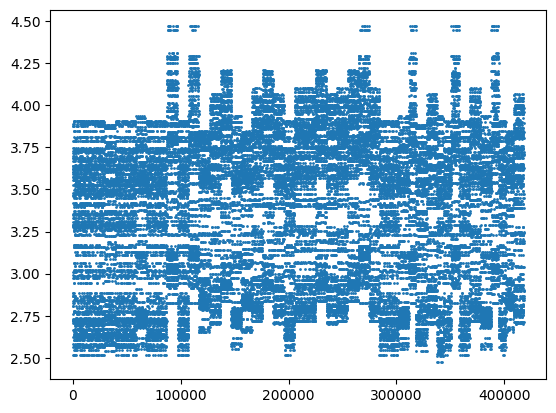

In [ ]:
# fuel price over rows
plt.plot(df["Fuel_Price"].sample(frac= 0.1), linestyle = "none", marker = ".", markersize = 2)

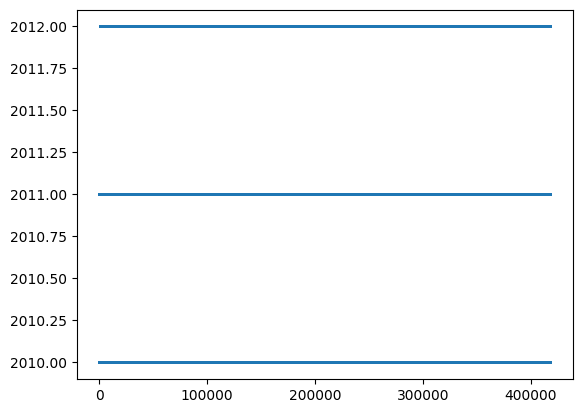

In [ ]:
# rows are not in chronologihal order
plt.plot(df["Year"], linestyle = "none", marker = ".", markersize = 2)

<Axes: >

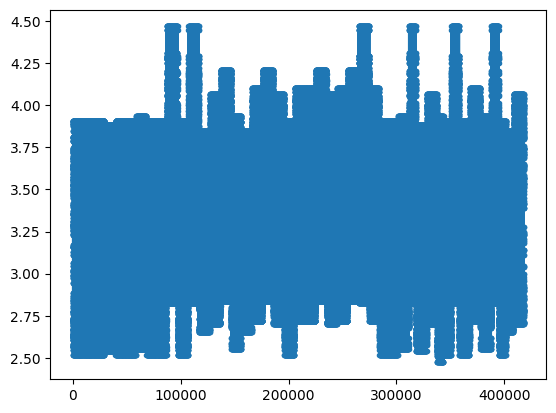

In [ ]:
df["Fuel_Price"].plot(marker = ".")

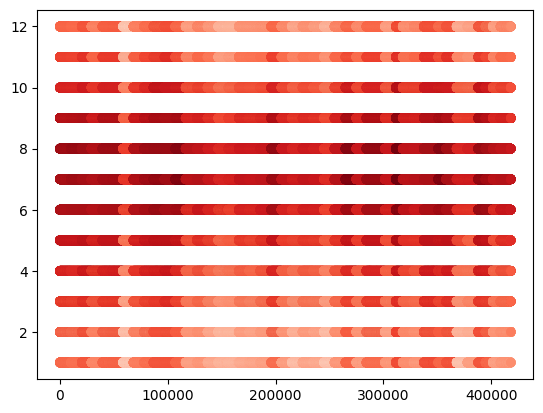

In [ ]:
# summer months  has the highest temperature (they are red)
plt.scatter(range(len(df)), df["Month"], c = df["Temperature"], cmap = "Reds")

# Usage of sns.heatmap(), plt.imshow(), plt.scatter()

We create descrete color map of three colors

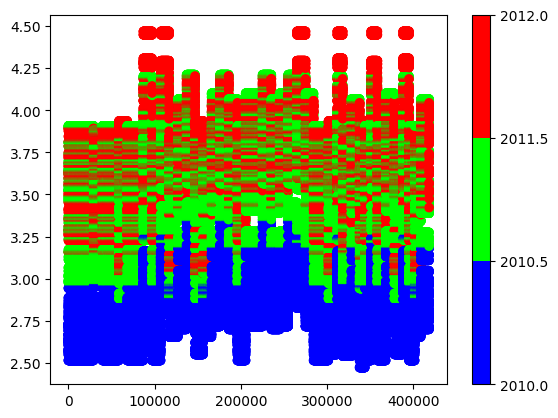

In [ ]:

# we can see that fuel price grows with year
norm1 = colors.BoundaryNorm([2010, 2010. + 0.5, 2011 + 0.5, 2012], 3) # define edges of 3 intervals, for corresponding 3 colors
colors_list =  ['#0000FF', '#00FF00', '#FF0000'] # cmap consists of 2 colors, cmap by default covers all value range, so the change in colors will occur max_val- min_val/2
cmap_years = colors.ListedColormap(colors_list)
plt.scatter(range(len(df)), df["Fuel_Price"], c = df["Year"].astype("int16"), cmap = cmap_years, norm = norm1)
plt.colorbar()

Use numerical variable (target in ml tasks) to color the scatter plot

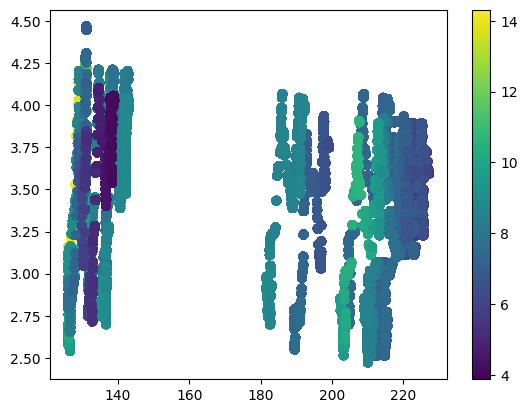

In [ ]:

plt.scatter(df["CPI"], df["Fuel_Price"], c = df["Unemployment"])
plt.colorbar()

Use categorical variable to color scatter plot

<Axes: xlabel='CPI', ylabel='Fuel_Price'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


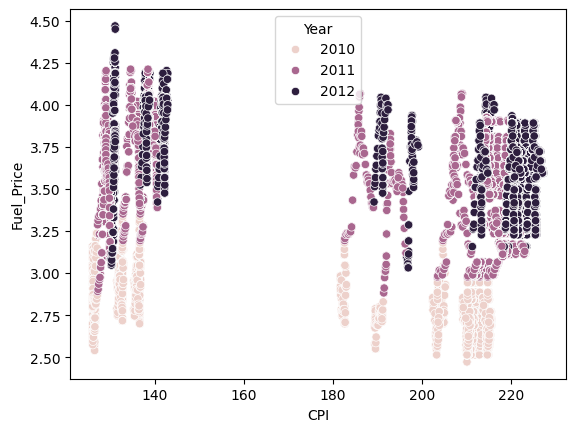

In [ ]:

sns.scatterplot(df, x = "CPI", y = "Fuel_Price", hue = "Year")

Use categorical variable to color scatter plot (MatplotLib version)

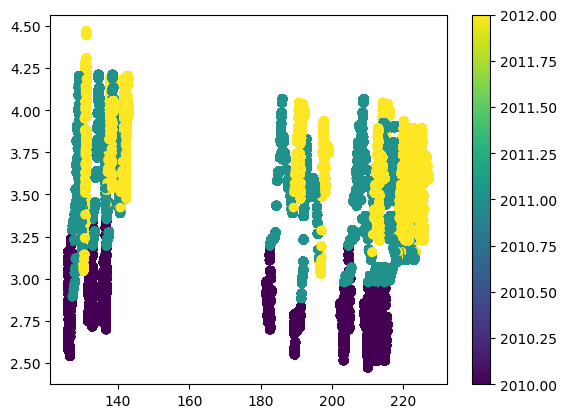

In [ ]:

plt.scatter(df["CPI"], df["Fuel_Price"], c = df["Year"])
plt.colorbar()

Using different marker size

<Axes: xlabel='CPI', ylabel='Fuel_Price'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


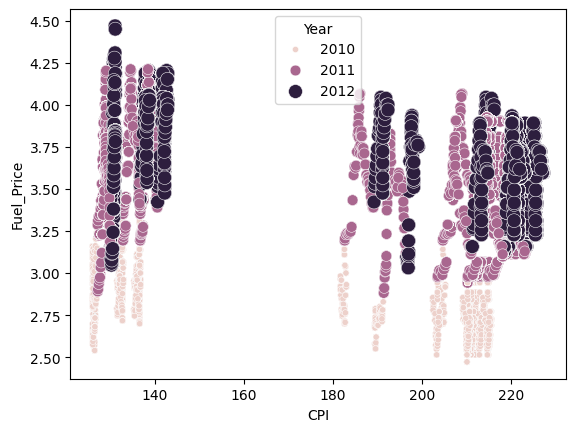

In [ ]:

sns.scatterplot(df, x = "CPI", y = "Fuel_Price", hue = "Year", size = "Year", sizes=(20, 100))

# Correlation matrix and other custom individual feature pair functions

sns.pairplot to show pairwise correlations

In [ ]:
numeric = ["Fuel_Price", "Temperature", "CPI", "Weekly_Sales", "Unemployment"]

correlation matrix using sns.heatmap

<Axes: >

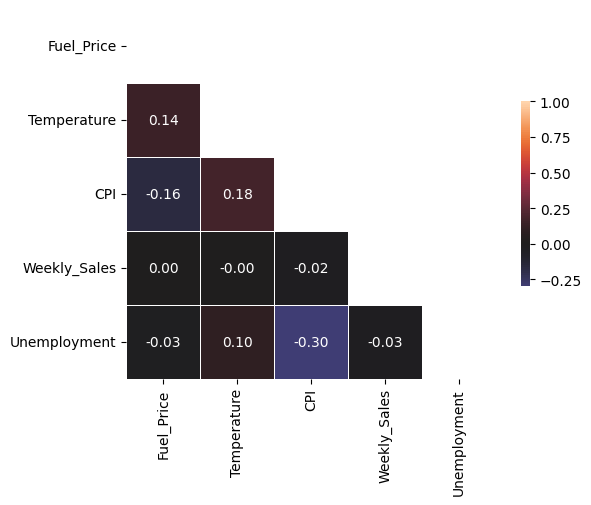

In [ ]:
corr = df[numeric].corr(method = "pearson")
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype= bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

custom pair wise function for comparison and visualization using plt.mathsow

In [ ]:
from itertools import combinations
def get_matx(df, columns : list):
  """
  this fucntion counts number of times a component of one feature
  greater than the corresponding component of the other, return
  dataframe similar to df.corr()< so we can easily plot it using sns.heatmap
  """
  arr = np.zeros((len(columns), len(columns)))
  pairs = list(combinations(columns, 2))
  indxs = list(combinations(range(len(columns)), 2))
  for i,pair in enumerate(pairs):
    arr[indxs[i]] = (df[pair[0]] > df[pair[1]]).sum()/len(df) * 100
    arr[(indxs[i][1], indxs[i][0])] = (df[pair[1]] > df[pair[0]]).sum()/len(df) * 100
  return pd.DataFrame(arr, index = columns, columns = columns)

<Axes: >

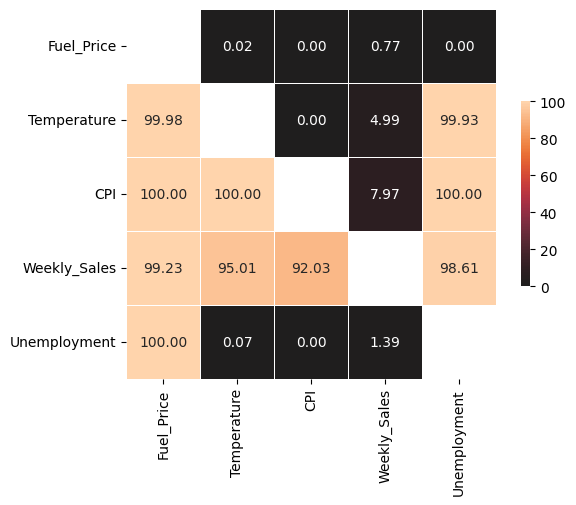

In [ ]:
sns.heatmap(get_matx(df, numeric), mask = np.eye(len(numeric), dtype = bool), vmax=100, center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# sns.pairplot, sns.countplot, sns.catplot, sns.barplot, sns.RELPLOT

Pair plot shows pair-wise relationship between features (similar to corr matrix). It's also possible to color objects for different target using hue param, inlucing classification as well as regression targets

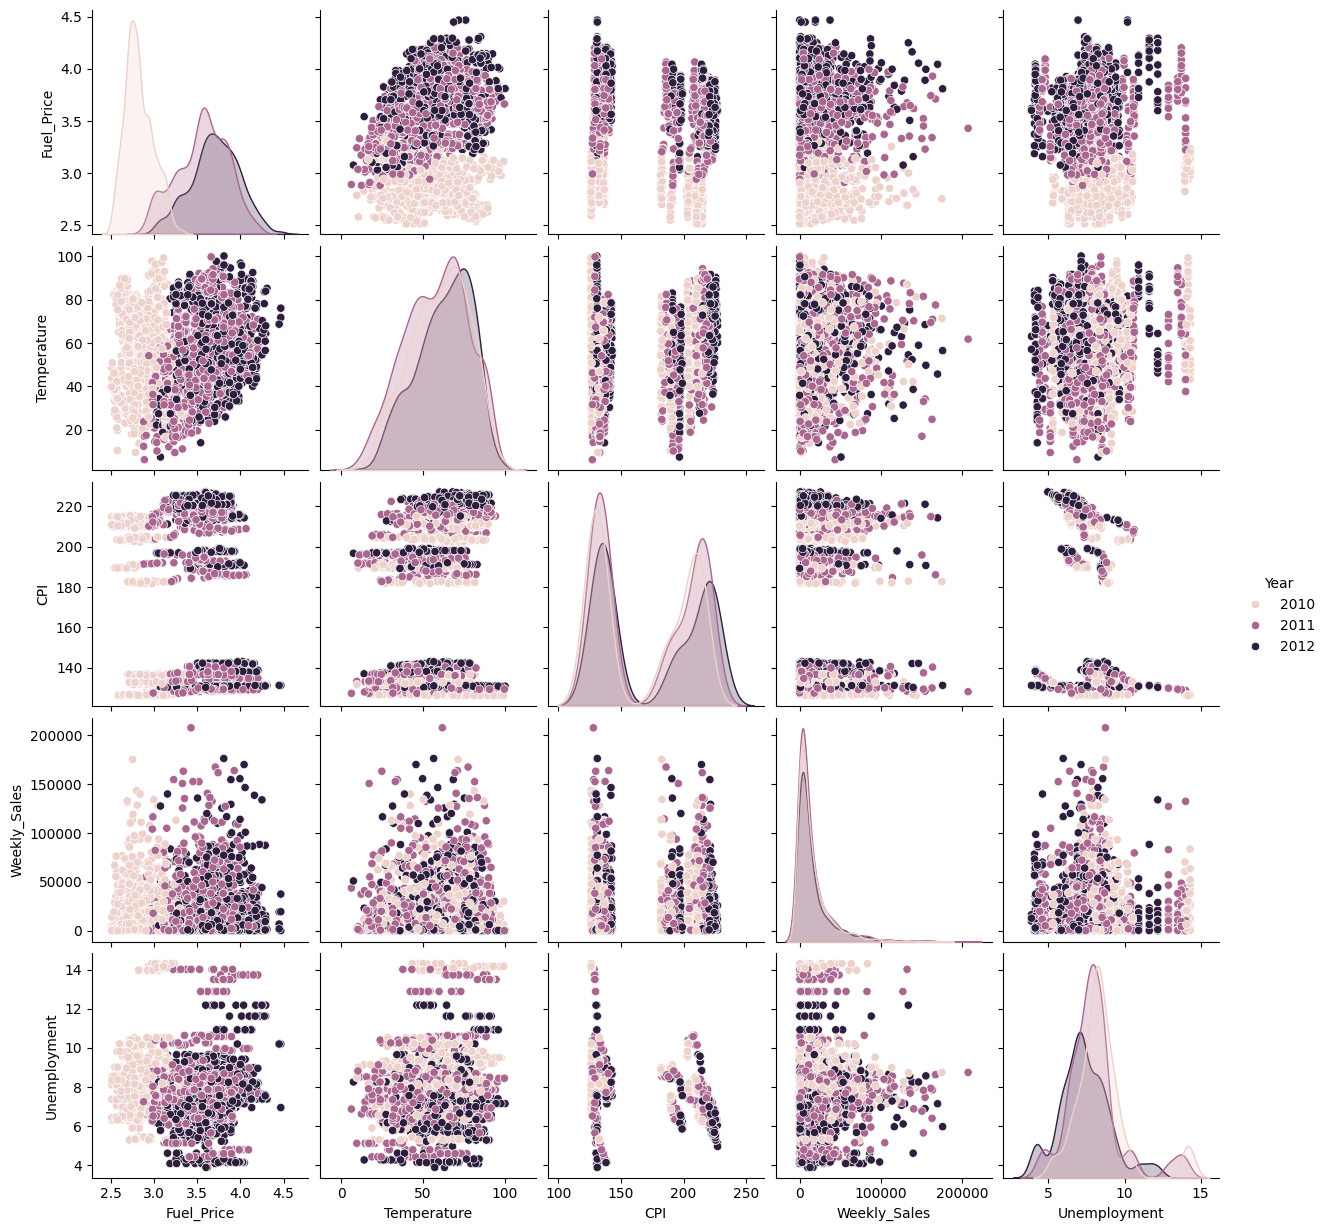

In [ ]:
sns.pairplot(df.sample(frac = 0.01)[numeric + ["Year"]], hue = "Year")

sns.countplot is analog of histogram but for categorical variables, it basically shows frequences of particular values of categorical variables, can be used to estimate probability mass function for each value, e.g. for probability correction of a classifier (in this case our categorical variable is y, i.e. the target) It applies only FOR ONE FEATURE at a time (you can't pass both x and y params into the countplot fucntion)

<Axes: xlabel='Type', ylabel='probability'>

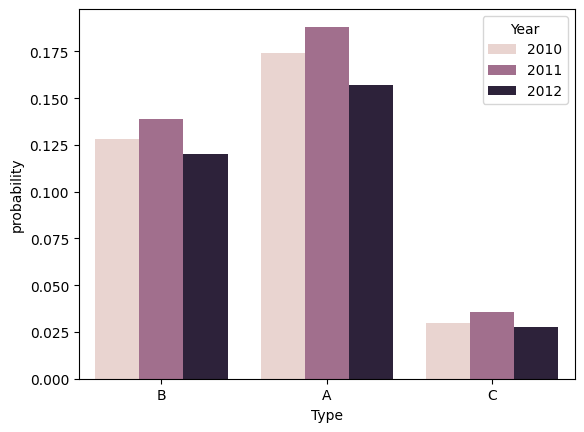

In [ ]:
sns.countplot(df.sample(frac = 0.01, random_state = 17), x = "Type", hue = "Year", stat = "probability")

sns.barplot computes some aggregation function over numerical variables grouped by categorical. (usually it's mean, but can be any function vector -> scalar)
So, for using barplot we need to specify ONE categorical variable, and ANOTHER numerical variable and also an aggregation function

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

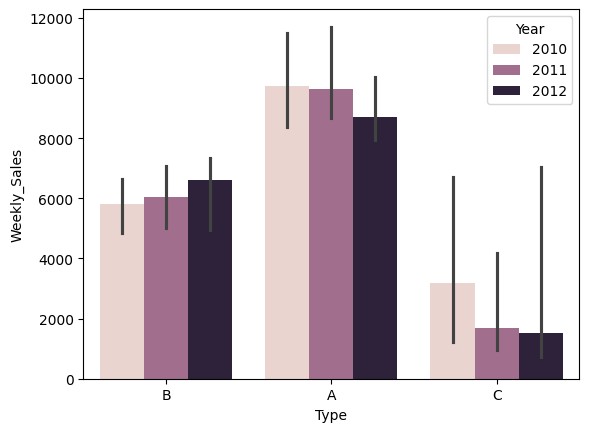

In [ ]:
sns.barplot(df.sample(frac = 0.01, random_state = 17), x = "Type", y = "Weekly_Sales",  hue = "Year", estimator = "median")

sns.catplot is used to compare relationship between categorical and numerical feature (it inldes kind = barplot, which was described above). It's a wrapper for the different plots for ease of use: sns.barplot, sns.swarmplot, sns.stripplot, sns.boxplot, sns.violinplot, etc.  

point estimate plot, allows to see estimates with error bars for different target values similar to barplot, but just sometimes it's more convinient visualization for comparison  

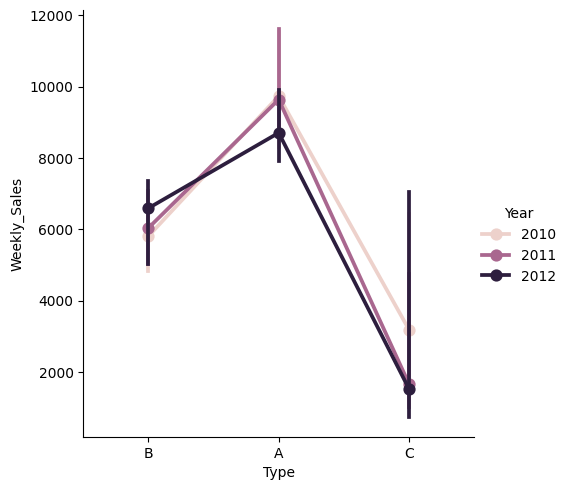

In [ ]:
sns.catplot(df.sample(frac = 0.01,random_state = 17 ), x = "Type", y = "Weekly_Sales",  hue = "Year", estimator = "median", kind = "point")

strip and swarm plots are scatter plot analogs for (categorical data vs numarical)  and (categorical vs categorical)

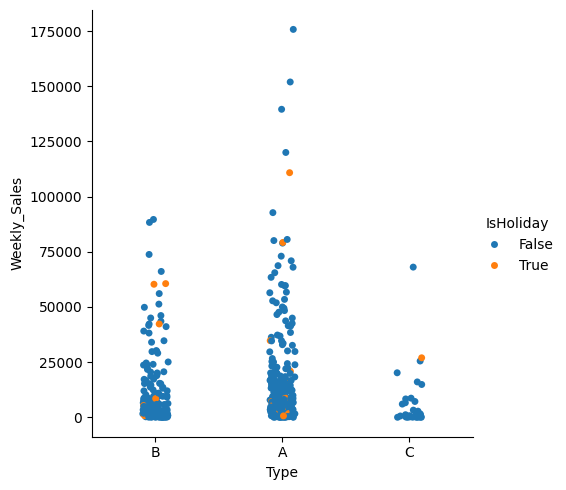

In [ ]:
sns.catplot(df.sample(frac = 0.001,random_state = 17 ), x = "Type", y = "Weekly_Sales", kind = "strip", hue = "IsHoliday")

swarmplot serves the same puprpose as stripplot, but it spreads points out to prevent them from overlapping

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.2% of the points cannot be plac

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


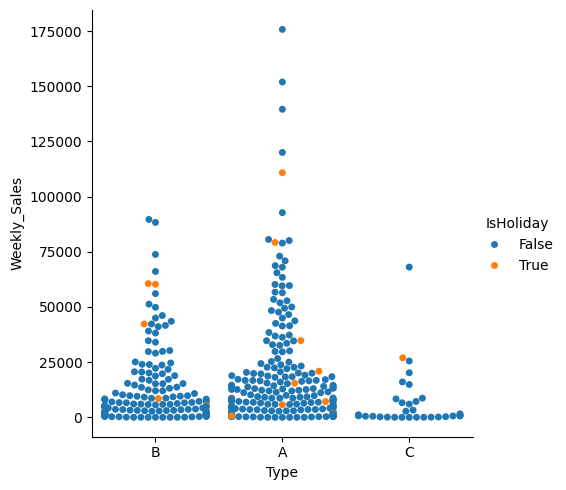

In [ ]:
sns.catplot(df.sample(frac = 0.001,random_state = 17 ), x = "Type", y = "Weekly_Sales", kind = "swarm", hue = "IsHoliday")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 86.3% of the points cannot be plac

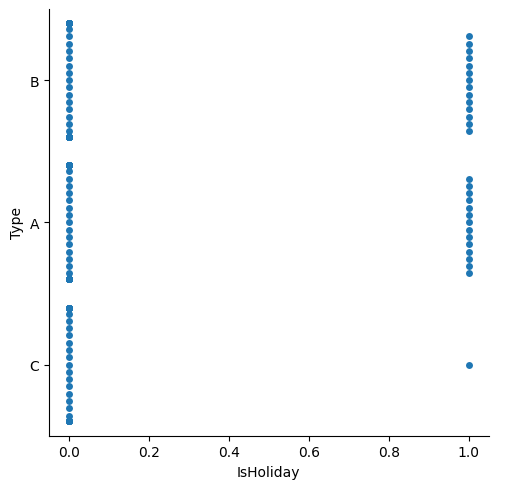

In [ ]:
sns.catplot(df.sample(frac = 0.001,random_state = 17 ), y = "Type", x = "IsHoliday", kind = "swarm")

## Melting/unpivot from wide to long format (basically turn some N column names into new variable, effectivily it reduces number of columns in N - 1, and increases the number of rows in a dataframe N times ) E.g. Useful for visualizing several plots per categorical variable using seaborn sns.RELPLOT

In [41]:
# total sales per store
total_sales = df[["Store", "Weekly_Sales", "Year", "Month"]].groupby(["Store", "Year", "Month"]).sum()

In [42]:
total_sales = total_sales.reset_index()

In [48]:
total_sales.shape # 1485*2

(1485, 4)

In [38]:
len(total_sales.columns) # 4

4

In [49]:
tot_sales_m = pd.melt(total_sales, id_vars = ["Weekly_Sales", "Year"], value_vars = ["Store", "Month"], var_name= "pivoted_column_names", value_name="pivoted_column_values")

In [50]:
tot_sales_m.head()

,Weekly_Sales,Year,pivoted_column_names,pivoted_column_values
0,6307344.10,2010,Store,1
1,5871293.98,2010,Store,1
2,7422801.92,2010,Store,1
3,5929938.64,2010,Store,1
4,6084081.46,2010,Store,1


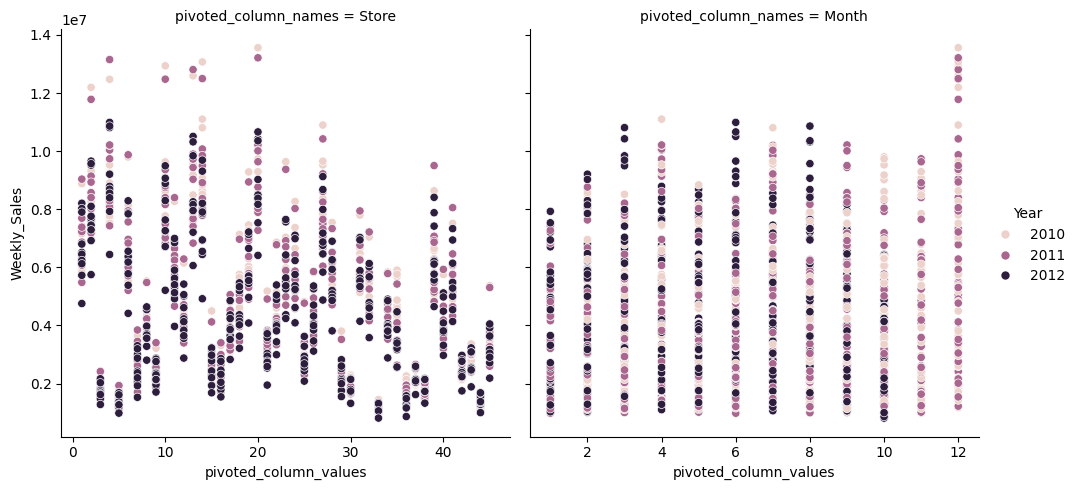

In [58]:
sns.relplot(data = tot_sales_m, x="pivoted_column_values", y="Weekly_Sales", col="pivoted_column_names",  hue =  "Year", facet_kws=dict(sharex=False))

# Looking for outliers (sns.boxplot)

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

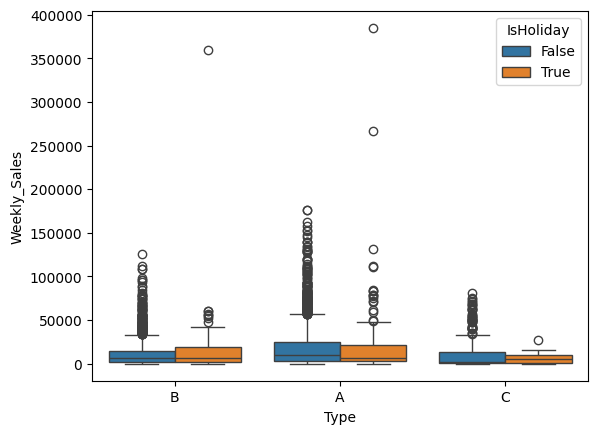

In [ ]:
sns.boxplot(df.sample(frac = 0.01,random_state = 17 ), x="Type", y="Weekly_Sales", hue = "IsHoliday")

__а)__ Подгрузите все необходимые для работы библиотеки.

In [ ]:
!pip install plotly_express

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


__б)__ Загрузите файл с данными. Отобразите первые и последние 5 наблюдений. Выведите на экран тип колонок. Приведите колонку `Date` к формату даты. В переменную `ans1` запишите число строк, которое есть в таблице.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418239 entries, 0 to 418238
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         418239 non-null  int64  
 1   Date          418239 non-null  object 
 2   Dept          418239 non-null  int64  
 3   Weekly_Sales  418239 non-null  float64
 4   IsHoliday     418239 non-null  bool   
 5   Type          418239 non-null  object 
 6   Size          418239 non-null  int64  
 7   Temperature   418239 non-null  float64
 8   Fuel_Price    418239 non-null  float64
 9   MarkDown1     147484 non-null  float64
 10  MarkDown2     108144 non-null  float64
 11  MarkDown3     134568 non-null  float64
 12  MarkDown4     132315 non-null  float64
 13  MarkDown5     148182 non-null  float64
 14  CPI           418239 non-null  float64
 15  Unemployment  418239 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.3+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418239 entries, 0 to 418238
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         418239 non-null  int64         
 1   Date          418239 non-null  datetime64[ns]
 2   Dept          418239 non-null  int64         
 3   Weekly_Sales  418239 non-null  float64       
 4   IsHoliday     418239 non-null  bool          
 5   Type          418239 non-null  object        
 6   Size          418239 non-null  int64         
 7   Temperature   418239 non-null  float64       
 8   Fuel_Price    418239 non-null  float64       
 9   MarkDown1     147484 non-null  float64       
 10  MarkDown2     108144 non-null  float64       
 11  MarkDown3     134568 non-null  float64       
 12  MarkDown4     132315 non-null  float64       
 13  MarkDown5     148182 non-null  float64       
 14  CPI           418239 non-null  float64       
 15  Unemployment  418

In [ ]:
len(df)

418239

# Visualizing missing values with sns.heatmap

__в)__ Разберитесь с пропущенными переменными:

- Выведите на экран, сколько пропущенных значений в процентах есть в каждой переменной.
- Визуализируйте пропуски с помощью функции `sns.heatmap`. Не надо рисовать картинку сразу для всего датасета. На визуализации нам хочется посмотреть на то, как пропуски в разных переменных соотносятся друг с другом. Отберите случайные $10\%$ наблюдений из исходной таблички методом `.sample( )` и визуализируйте их.
- Запишите в переменную `ans2` число переменных, которые имеют более $60\%$ пропусков.
- Удалите эти переменные из набора данных.

In [ ]:
# percentage of missing values
df.isnull().sum()/len(df)*100

,0
Store,0.000000
Date,0.000000
Dept,0.000000
Weekly_Sales,0.000000
IsHoliday,0.000000
Type,0.000000
Size,0.000000
Temperature,0.000000
Fuel_Price,0.000000
MarkDown1,64.736909


<Axes: >

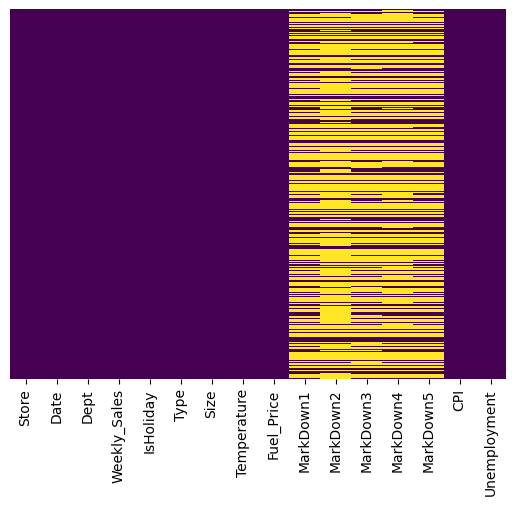

In [ ]:
sns.heatmap(df.sample(frac = 0.001).isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.describe()

,Store,Date,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,418239.000000,418239,418239.000000,418239.000000,418239.000000,418239.000000,418239.000000,147484.000000,108144.000000,134568.000000,132315.000000,148182.000000,418239.000000,418239.000000
mean,22.198181,2011-06-14 14:55:01.413784832,44.248731,15999.603935,136750.034777,60.083540,3.357760,7295.267614,3425.117063,1461.829790,3432.718250,4684.615370,171.162605,7.967812
min,1.000000,2010-02-05 00:00:00,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,2010-10-08 00:00:00,18.000000,2090.030000,93638.000000,46.660000,2.925000,2241.190000,42.640000,5.070000,516.810000,1924.990000,132.022667,6.891000
50%,22.000000,2011-06-17 00:00:00,37.000000,7625.990000,140167.000000,62.100000,3.445000,5359.220000,207.800000,24.230000,1518.750000,3402.660000,182.318780,7.866000
75%,33.000000,2012-02-17 00:00:00,74.000000,20226.575000,202505.000000,74.365000,3.735000,9252.470000,2105.640000,103.130000,3640.700000,5621.090000,212.369187,8.572000
max,45.000000,2012-10-19 00:00:00,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.214288,14.313000
std,12.784899,NaN,30.494552,22727.073873,60972.779649,18.493498,0.458124,8354.419003,9590.531781,9695.839324,6341.597892,6006.981194,39.141697,1.863183


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 6
ans2 = ...

# your code here


In [ ]:
# проверка, что задание решено корректно
assert ans2 > 4
assert ans2 < 10

# Подобные тесты скрыты от вас

# TIMADELTA datatype to work with DATETIME differences

__г)__ Сколько уникальных магазинов есть в данных? Запишите их число в переменную `ans3`. Сколько уникальных отделов есть в данных? Запишите их число в переменную `ans4`. За какой диапазон у нас присутствуют данные? Запишите этот диапазон, выраженный в числе дней, в переменную `ans5`.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 555
ans3 = len(df["Store"].unique())
ans4 = len(df["Dept"].unique())
total_period_days = (df["Date"].max() - df["Date"].min()).days # difference of DATETIME returns TIMEDELTA

# your code here


In [ ]:
# проверка, что задание решено корректно
assert ans3 < 50
assert ans4 > 80
assert ans5 > 900

# Подобные тесты скрыты от вас

# Plotting time series with datetime and sns.lineplot

__д)__ Посмотрим на динамику продаж в магазинах в целом. Для этого построим график, где по оси $x$ будет отложена дата, а по оси $y$ продажи по всей сети Walmart. Обязательно подпишите у графика оси. В какой день наблюдаются максимальные продажи? Запишите дату этого дня в переменную `ans6` в формате `год-месяц-день`.

Насколько хорошо идут дела у магазинов? Есть ли в динамике продаж какие-то интересные особенности? Как думаете, с чем они связаны?

У нас есть общий период наблюдения 987 дней, из низ только 142 уникальные, по графе Weekday видно что сбор данных шёл каждую неделю. Будем суммировать данные по всем магазинам за каждую неделю. т.е. estimator = 'sum'.  

(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584.]),
 [Text(14610.0, 0, '2010-01'),
  Text(14730.0, 0, '2010-05'),
  Text(14853.0, 0, '2010-09'),
  Text(14975.0, 0, '2011-01'),
  Text(15095.0, 0, '2011-05'),
  Text(15218.0, 0, '2011-09'),
  Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09')])

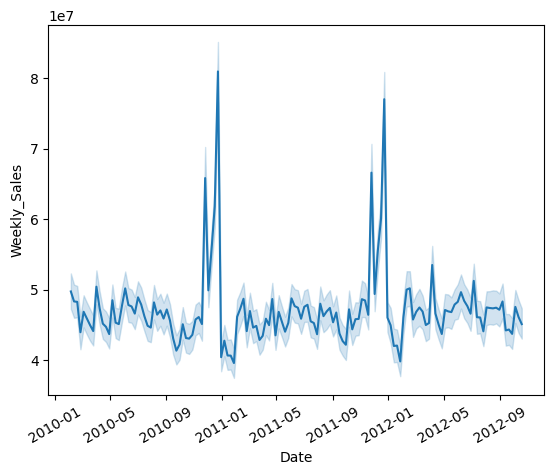

In [ ]:
sns.lineplot(data=df, x="Date", y="Weekly_Sales", estimator = "sum")
plt.xticks(rotation=30)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: строка, пример: '2010-12-04'
# Вокруг ответа не должно быть никаких надписей array(['pip fruit']) или Index('pip fruit')
# Это должна быть именно строка, а не строка в массиве
max_sales_date = df[["Date", "Weekly_Sales"]].groupby("Date").sum().idxmax()
ans6 = str(max_sales_date.iloc[0]).split()[0]

# your code here


In [ ]:
# проверка, что задание решено корректно
assert ans6.split('-')[-1] == '24'

# Подобные тесты скрыты от вас

__е)__ Найдите и нарисуйте матрицу корреляции для числовых показателей. Какие два показателя коррелируют сильнее всего? Запишите модуль получившегося значения в переменную `ans7` (корреляция мб отрицательной).

При строительстве матрицы не надо брать в расчёт номер магазина, номер отдела и размер магазина, так как их взаимосвязь с другими показателями не имеет никакого смысла.

Обратите отдельное внимание на знак корреляции между безработицей (Unemployment) и индексом потребительских цен (CPI). Про него в конце тетрадки вас ждёт отдельная история.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа действительное число, пример: 0.22222
# Не забудьте взять модуль от матрицы корреляций!
ans7 = ...

# your code here


Постройте между этими же переменными облака рассеивания методом `sns.pairplot`. Не надо строить эту визуализацию сразу же для всех точек, которые есть в данных. Отберите случайные $10\%$ наблюдений для картинки с помощью метода `.sample( )`.

- Как думате, между какими переменными в данных присутствует нелинейная взаимосвязь?
- Как думаете, какое распределение у цен? Как бы вы его нормализовали, если бы вам это понадобилось?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


In [ ]:
# проверка, что задание решено корректно
assert ans7 > 0.2
assert ans7 < 0.35

# Подобные тесты скрыты от вас

__ё)__  Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике. Правда ли, что пик продаж у них происходит примерно в одно время? Как думаете, с чем связан этот пик?

In [ ]:
top5_stores = df[["Store", "Weekly_Sales"]].groupby("Store").sum().sort_values("Weekly_Sales",  ascending=False).iloc[0:5].index.to_list()
mask = df["Store"].isin(top5_stores)
df_top_5 = df[["Store", "Weekly_Sales", "Date"]][mask]

(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584.]),
 [Text(14610.0, 0, '2010-01'),
  Text(14730.0, 0, '2010-05'),
  Text(14853.0, 0, '2010-09'),
  Text(14975.0, 0, '2011-01'),
  Text(15095.0, 0, '2011-05'),
  Text(15218.0, 0, '2011-09'),
  Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09')])

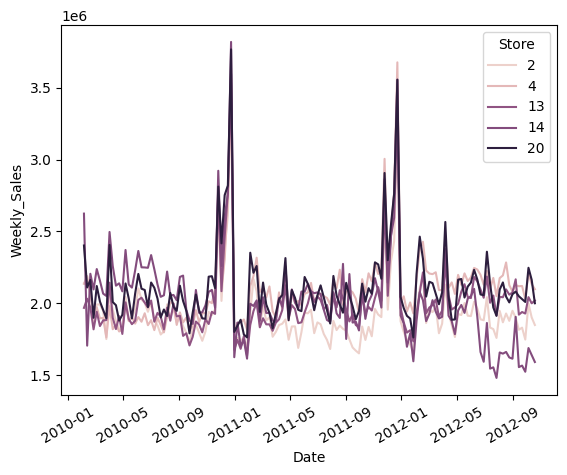

In [ ]:
sns.lineplot(data=df_top_5, x="Date", y="Weekly_Sales", hue = "Store", estimator = "sum", errorbar = None)
plt.xticks(rotation=30)

# Pandas groupby usage

__ж)__ Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них.

In [ ]:
x  = (df["Year"] == 2011) & (df["Type"] == "A")

In [ ]:
top_10_dept = df[["Dept", "Year", "Weekly_Sales"]].loc[(df["Type"] == "A") & (df["Year"] == 2011)].groupby("Dept").sum().sort_values("Weekly_Sales",  ascending=False).iloc[0:10].index.to_list()

In [ ]:
mask = df["Dept"].isin(top_10_dept)
df_top10_dept = df[mask & (df["Year"] == 2011)][["Dept", "Weekly_Sales"]]

<Axes: xlabel='Dept', ylabel='Weekly_Sales'>

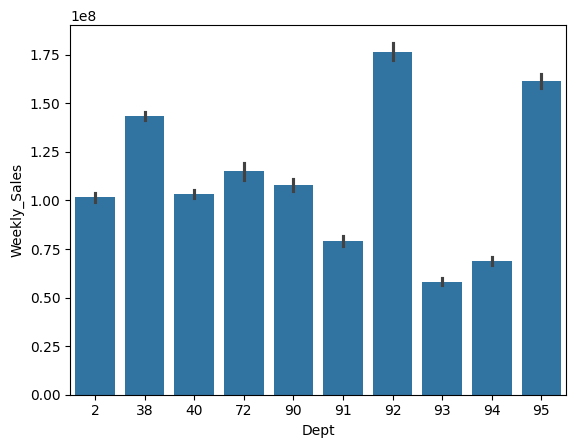

In [ ]:
sns.barplot(df_top10_dept, x = "Dept", y = "Weekly_Sales", estimator = "sum")

# Бонусная история про анализ данных и ошибки, которые мы при нём совершаем

Помните, когда мы смотрели на корреляционную матрицу, мы увидели, что между безработицей и инфляцией есть отрицательная взаимосвязь: чем больше безработица, тем ниже инфляция. В экономике эта взаимосвязь называется кривой Филиппса. И за ней кроется очень интересная история из целой плеяды ошибок. Давайте попробуем научиться на чужих ошибках чему-нибудь новому.

В $1958$ году была опубликована статья экономиста Филиппса, в которой он обнаружил достаточно чёткую отрицательную связь между инфляцией и безработицей в Англии за прошедшие $70$ лет. Проверка этой работы на американских данных подтвердила наличие взаимосвязи. Так родилась знаменитая кривая Филиппса. Её стали интерпретировать как некую возможность выбора между высокой инфляцией и высокой безработицей. Нужно сократить безработицу? Давайте напечатаем денег и разгоним инфляцию!

Любому политику безработица кажется более значимой социальной проблемой, нежели инфляция, и он хочет её победить любыми доступными средствами. Самым популярным средством по борьбе с безработицей является агрессивная монетарная политика, которая состоит в расширении денежной массы. Грубо говоря, просто печатают ещё денег. Именно это и было сделано президентом США Ричардом Никсоном в начале $1970$-х гг. в ходе погони за низкой безработицей и высокой инфляцией.

К сожалению, план Никсона удался только наполовину, он добился высокой инфляции, но сбить безработицу не смог. В краткосрочном периоде она действительно упала, но через некоторое время вернулась назад. Кривая Филиппса в этот период времени исчезла из данных. Никакой взаимосвязи между безработицей и инфляцией больше не прослеживалось.

В течение $70$-х все Западные страны поэкспериментировали с кривой Филиппса. В конечном итоге, $1980$-е годы были потрачены на обуздание разогнанной инфляции. Победа над инфляцией обошлась довольно дорого. Например, Пол Волкер, возглавлявший в этот период времени ФРС США, взвинтил процентную ставку до $19\%$. Высокие ставки отправили экономику в рецессию. Такая жёсткая принципиальная политика ФРС позволила сбить инфляционные ожидания.

__Какова мораль этой истории?__ Политики увидели в данных закономерность, но начав бороться с безработицей, печатая деньги, немного перепутали причину и следствие. На самом деле никакой чёткой отрицательной зависимости между инфляцией и безработицей в природе не существует. Её наличие в данных является следствием сложного взаимодействия между экономическими агентами. Политики пытавшись воздействовать на следствие, а не на причину, из-за этого у них не получилось достичь своих целей.

Не путайте причину и следствие, когда смотрите в данные и помните, что работа с ними малость сложнее, чем кажется на первый взгляд. __Корреляция не обозначает причинности.__